<a href="https://colab.research.google.com/github/Prateek-1110/seb_dl/blob/main/23may.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import torch

**Lect 3.3**

In [8]:
x0 , x1 , x2 = 1.,2.,3.
bias , w1,w2 = .1,.3,.5
x = [x0,x1,x2]
w = [bias , w1,w2]

In [9]:
z = 0
for i in range(len(x)):
  z +=x[i]*w[i]
print(z)

2.2


In [10]:
import numpy as np
xvec = np.array(x)
yvec = np.array(w)
cost = np.dot(xvec.transpose(),yvec)
print(cost)


2.2


**Lect 3.4**

**Using Numpy**

In [11]:
# data =pd.read_csv("/content/perceptron_toydata.txt",header = None)
# X = data.iloc[: , :-2].values
# y = data.iloc[: , :-2].values
# print("X shape:", X.shape)
# print("y shape:", y.shape)
data = pd.read_csv("/content/perceptron_toydata.txt", delimiter='\t', header=None)
print("Data shape:", data.shape)
X = data.iloc[:, :-1].values  # first 2 columns
y = data.iloc[:, -1].values   # last column
# Check that it looks right
print("X shape:", X.shape)  # should be (100, 2)
print("y shape:", y.shape)  # should be (100,)


Data shape: (100, 3)
X shape: (100, 2)
y shape: (100,)


In [12]:
# shuffle data and train-test split
s_id = np.arange(y.shape[0])
s_rn = np.random.RandomState(123)
s_rn.shuffle(s_id)
X,y = X[s_id],y[s_id]
X_train , X_test = X[s_id[:70]] , X[s_id[70: ]]
y_train , y_test = y[s_id[:70]] , y[s_id[70: ]]
mu , sigma = X_train.mean(axis=0),X_train.std(axis=0)
# normalise (mean zero , unit variance)
X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma

In [13]:
X_train.mean(axis=0)

array([2.06184276e-17, 7.93016446e-18])

In [14]:
# import numpy as np

class Perceptron():
    def __init__(self, numf):
        self.num_features = numf
        self.weights = np.zeros((numf, 1), dtype=np.float32)
        self.bias = np.zeros(1, dtype=np.float32)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions

    def backward(self, x, y):
        y = y.reshape(-1, 1)  # Make sure y is 2D to match predictions
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs):
        y = y.reshape(-1, 1)  # Ensure y is 2D for training
        for e in range(epochs):
            for i in range(y.shape[0]):
                xi = x[i].reshape(1, self.num_features)      # shape (1, num_features)
                yi = y[i].reshape(1, 1)                       # shape (1, 1)
                errors = self.backward(xi, yi)                # shape (1, 1)
                self.weights += (errors * xi).T               # broadcast properly
                self.bias += errors.flatten()                 # add scalar error

    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy


In [15]:
# p = Perceptron(numf=2)
# p.train(X_train,y_train,epochs=5)

# print('model parameters:\n\n')
# print('weights:%s\n' %p.weights)
# print('bias:%s\n' %p.bias)

# Assume X and y are already defined
p = Perceptron(numf=2)
p.train(X, y, epochs=5)

print("Model parameters:")
print("Weights:\n", p.weights)
print("Bias:\n", p.bias)

acc = p.evaluate(X, y)
print("Accuracy on training data: %.2f%%" % (acc * 100))


Model parameters:
Weights:
 [[2.19     ]
 [0.8900001]]
Bias:
 [-2.]
Accuracy on training data: 100.00%


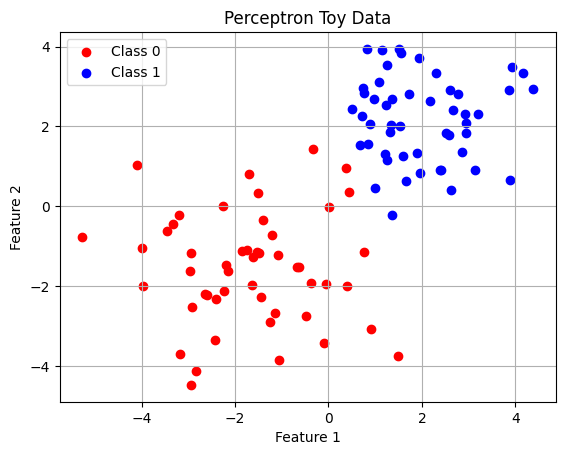

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title("Perceptron Toy Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


**Using pytorch**

In [17]:
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1,
                                   dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)
        self.ones = torch.ones(1)
        self.zeros = torch.zeros(1)
    def forward(self, x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs):
        for e in range(epochs):

            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors

    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy


In [18]:
ppn = Perceptron(num_features=2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=5)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

Model parameters:
  Weights: tensor([[1.2734],
        [1.3464]])
  Bias: tensor([-1.])


In [19]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


**lect 4.1**

In [20]:
t = torch.tensor([[1,2,3],[4,5,6]])
print(t.shape)
print(t.ndim)
print(t.dtype)

torch.Size([2, 3])
2
torch.int64


In [21]:
print(t.matmul(t.T))
# print(t.dot(t.T))
print(t @(t.T))

tensor([[14, 32],
        [32, 77]])
tensor([[14, 32],
        [32, 77]])


In [22]:
print(torch.cuda.is_available())

False


In [24]:
print(torch.tensor([1,2,3])+1)

tensor([2, 3, 4])
